## Chiral Test Program (First data)

In [51]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

%matplotlib inline


In [53]:
# chiral データの読み込み
chiral = pd.read_csv('AI_2-chiral(Exp_The).csv')

# データの最初の部分の表示
chiral.head()


,Table No.,ICSD No.,Space Group,Struct.formula,Unnamed: 4,元素1,元素1数,族1,周期1,Unnamed: 9,元素2,元素2数,族2,周期2,晶系,Unnamed: 15,Unnamed: 16
0,76,62259,P 41,Cs3 P7,Cs3,Cs,3.00,1,6,P7,P,7.0,15,3,Tetragonal,NaN,NaN
1,76,88519,P 41,B5 H9,B5,B,5.00,13,2,H9,H,9.0,1,1,Tetragonal,NaN,NaN
2,76,406486,P 41,Cs4 Ge9,Cs4,Cs,4.00,1,6,Ge9,Ge,9.0,14,4,Tetragonal,NaN,NaN
3,76,174242,P 41,Sc0.96 B15,Sc0.96,Sc,0.96,3,4,B15,B,15.0,13,2,Tetragonal,NaN,NaN
4,76,422423,P 41,Sc B15,Sc,Sc,1.00,3,4,B15,B,15.0,13,2,Tetragonal,NaN,NaN


In [54]:
# achiral データの読み込み
achiral = pd.read_csv('AI_2-achiral.csv')

# データの最初の部分の表示
achiral.head()

,Table No.,ICSD No.,Space Group,Struct.formula,Unnamed: 4,元素1,元素1数,族1,周期1,Unnamed: 9,元素2,元素2数,族2,周期2,晶系,Unnamed: 15,Unnamed: 16
0,2,109,P -1,Te I,Te,Te,1.0,16,5,I,I,1.0,17,5,Triclinic,NaN,NaN
1,2,193,P -1,Ca As3,Ca,Ca,1.0,2,4,As3,As,3.0,15,4,Triclinic,NaN,NaN
2,2,197,P -1,V7 O13,V7,V,7.0,5,4,O13,O,13.0,16,2,Triclinic,NaN,NaN
3,2,1501,P -1,V O2,V,V,1.0,5,4,O2,O,2.0,16,2,Triclinic,NaN,NaN
4,2,2380,P -1,Nb S3,Nb,Nb,1.0,5,5,S3,S,3.0,16,3,Triclinic,NaN,NaN


In [55]:
X_chiral = chiral[['族1', '族2']]
y_chiral = np.ones((len(X_chiral)))

#print(X_chiral)
#print(y_chiral)

X_achiral = achiral[['族1', '族2']]
y_achiral = np.zeros((len(X_achiral)))

#print(X_achiral)
#print(y_achiral)

In [56]:
X = np.concatenate((X_chiral, X_achiral), axis=0)
y = np.concatenate((y_chiral, y_achiral), axis=0)
print('X=', X)
print('y=', y)

# Binary representation of the variables
a_categorical = np_utils.to_categorical(X[:,0]-1)
print('A=', a_categorical)


b_categorical = np_utils.to_categorical(X[:,1]-1)

print('B=', b_categorical)

#print(np.sum(b_categorical, axis=0))

# concatenate a_categorical and b_categorical
abxy = np.c_[a_categorical, b_categorical]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,3]/X[:,2]]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,2:3]]

print('AB=', abxy)

#print(np.sum(abxy, axis=0))


X= [[ 1 15]
 [13  1]
 [ 1 14]
 ..., 
 [ 1 14]
 [14 16]
 [ 8 14]]
y= [ 1.  1.  1. ...,  0.  0.  0.]
A= [[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
B= [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
AB= [[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


全サンプルにロジスティック回帰を適用

Logistic Regression for Categorical Data (using all samples)
Recognition Rates =  0.973535898064
Intercept is  -3.56248345198
Coeffs are
-0.411522662133
-0.249805459434
-2.35114085659
-0.545102928204
0.0546439063033
-0.496649788878
0.287405386244
0.188141062018
0.159175180964
-0.708547100543
-0.635825455123
1.02472992116
-0.110694774282
0.19825825478
-1.32301860411
1.10797749739
0.450568611094
-0.201075642631
-1.02656132971
-1.35530933275
-2.09725728652
-0.589916984138
-1.46882159703
-1.17086425298
0.188507633066
0.489364401333
0.555324348502
-0.529359551876
0.586167557707
1.06863684975
0.64147273208
1.40569910366
-0.816926373899
0.746376689796
0.169940445519
-0.358956504476


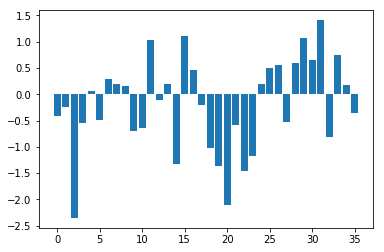

In [57]:
# logistic regression for categorical A and B
logreg = linear_model.LogisticRegression()

logreg.fit(abxy, y)

pred = logreg.predict(abxy)

#print('pred=', pred)

score = logreg.score(abxy, y)

print('Logistic Regression for Categorical Data (using all samples)')
print('Recognition Rates = ', score)

coeffs = logreg.coef_[0]
intercept = logreg.intercept_[0]

#print('Coeffs is ', coeffs)
print('Intercept is ', intercept)
print('Coeffs are')
for i in range(0, len(coeffs)):
    print(coeffs[i])

ix = range(0, len(coeffs))
plt.bar(ix, coeffs)
plt.show()
